In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [3]:
X = df.drop('target', axis=1)
Y = df.T.tail(1).T

In [4]:
from sklearn.preprocessing import StandardScaler
# Z scoring data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

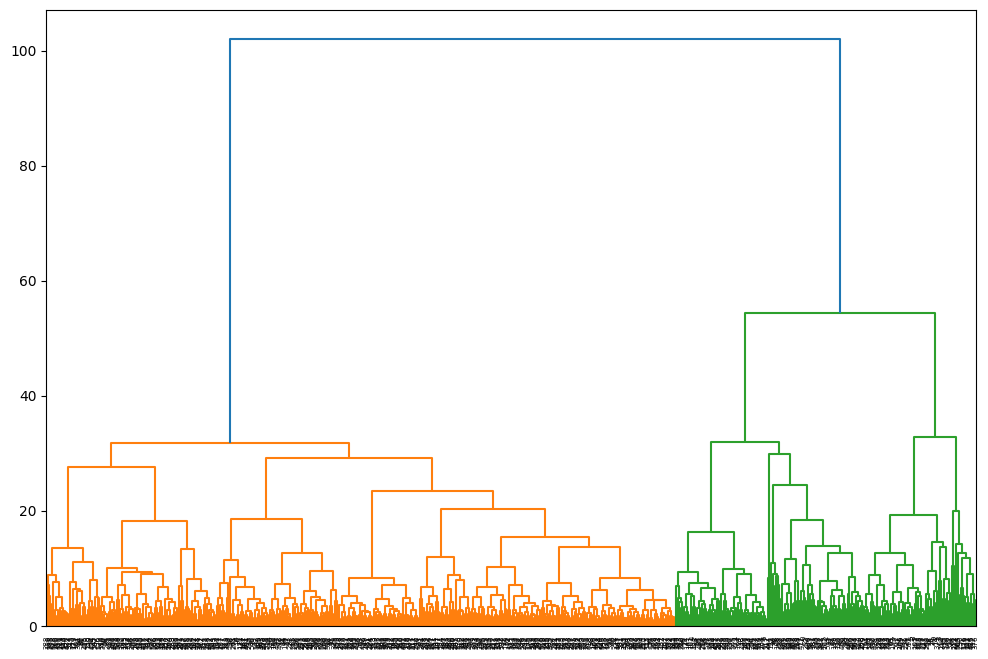

In [5]:
from scipy.cluster import hierarchy
# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


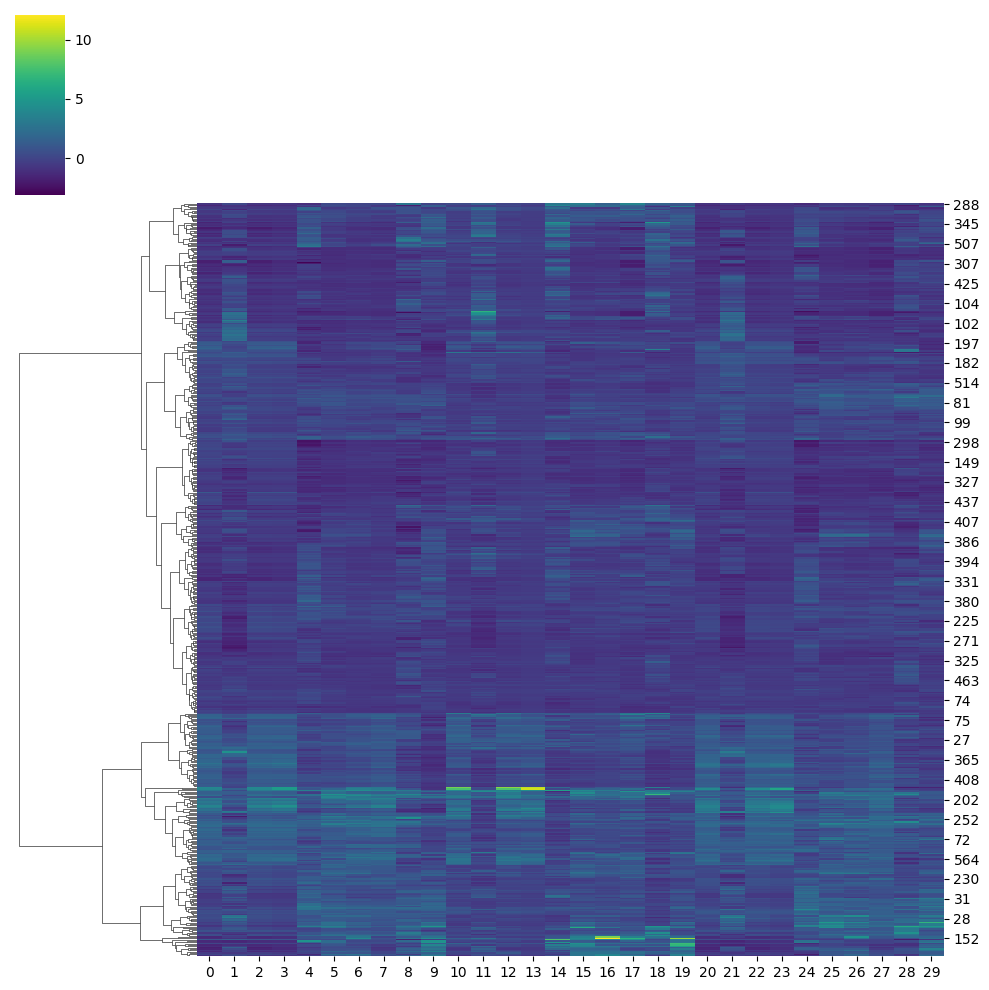

In [6]:
# We can also use seaborn's clustermap for a more detailed view
sns.clustermap(X_scaled, method='ward', col_cluster=False, cmap='viridis')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering on data
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df['label'] = cluster.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


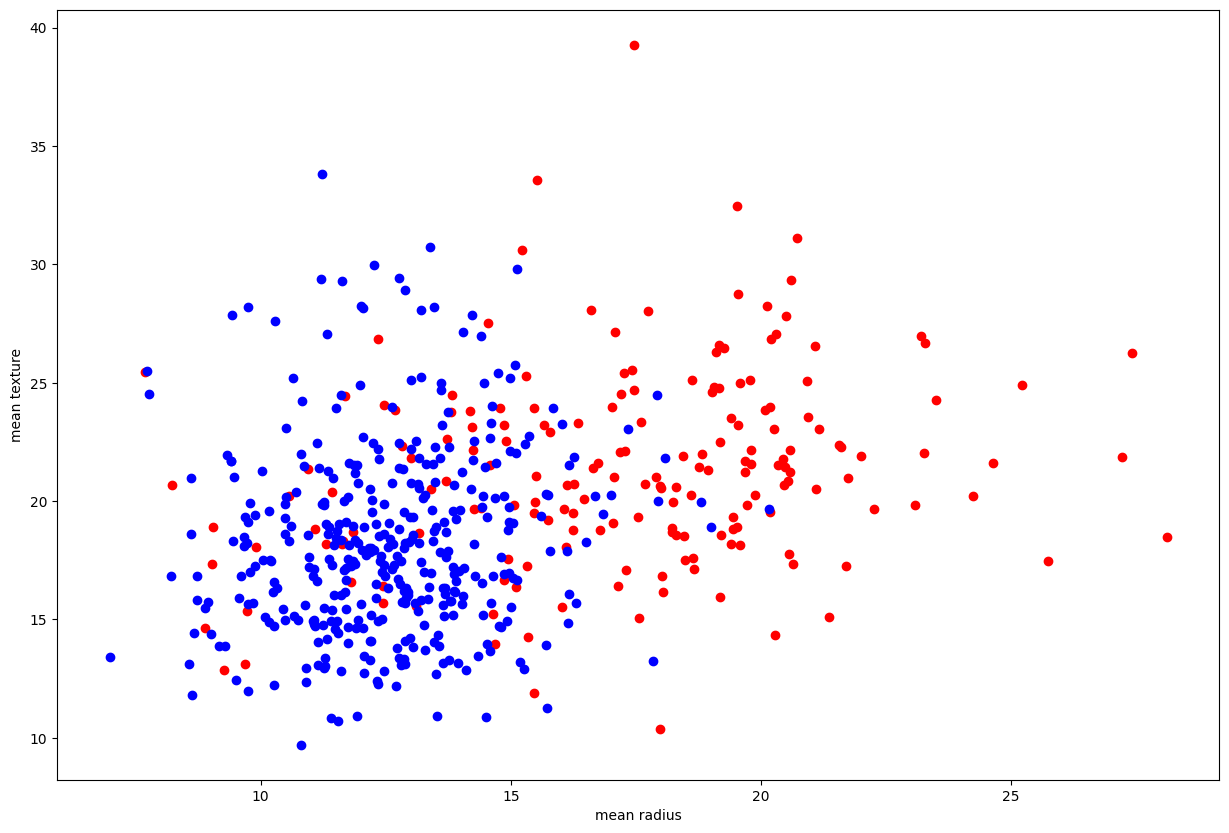

In [8]:
plt.figure(figsize = (15, 10))
plt.scatter(df["mean radius"][df.label == 0], df["mean texture"][df.label == 0], color = "red")
plt.scatter(df["mean radius"][df.label == 1], df["mean texture"][df.label == 1], color = "blue")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

In [9]:
# Since clustering is an unsupervised learning method, we typically don't use a traditional "train and test" approach
# as we do with supervised learning methods. Clustering models are trained on the entire dataset and the clusters
# themselves are the outcome of interest. However, if we have labels for our data (as we do in this case with the
# target variable in the breast cancer dataset), we can use those labels to evaluate how well our clustering algorithm
# is doing. This is called external evaluation.
from sklearn.metrics import adjusted_rand_score
# Evaluate the clustering
score = adjusted_rand_score(df['target'], df['label'])
print(f"Accuracy: {score}")

Accuracy: 0.5750409366326297


In [10]:
# Creating a 2D visualization to visualize the clusters
# Used tSNE instead of PCA because it's nonlinear algorithm
# Please note that it's not deterministic and different runs may produce different results.
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.178085
[t-SNE] KL divergence after 1850 iterations: 0.861007


Text(0.5, 1.0, 'Actual clusters')

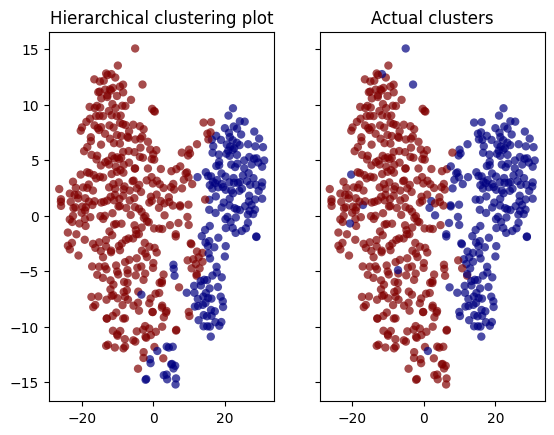

In [12]:
# Visualizing our hierarchial clustering we did in previous part and actual clusters
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=df['label'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = df['target'], cmap = "jet", edgecolor = "None", alpha=0.7)
ax2.set_title('Actual clusters')